- *Nombre del Alumno/a*: 
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2022/2023
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

# Documentación de Apoyo

- Lección 5. Regresión Lineal, No Lineal y Logística.
- Regresión lineal con Python. Joaquin Amat Rodrigo. Octubre, 2020. https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
- Step by Step Regression & Backwards Elimination. https://www.kaggle.com/ashishsaxena2209/step-by-step-regression-backward-elimination

---

- Videos:
    - *DotCSV: Regresión Lineal y Mínimos Cuadrados Ordinarios:* https://www.youtube.com/watch?v=k964_uNn3l0
    - *DotCSV: IA NOTEBOOK #1 | Regresión Lineal y Mínimos Cuadrados Ordinarios | Programando IA:* https://www.youtube.com/watch?v=w2RJ1D6kz-o&t=175s
    - *StatQuest: Linear Regression, Clearly Explained!!!* https://www.youtube.com/watch?v=7ArmBVF2dCs
    - *StatQuest: Multiple Regression, Clearly Explained!!!* https://www.youtube.com/watch?v=EkAQAi3a4js

# Modelo de Regresión Lineal de 'Pollution'

Ahora vamos a realizar un modelo de regresión lineal y vamos a aprender a ajustar e interpretar correctamente un modelo.

La base de datos tiene las siguientes características:

-	PREC: Precipitación media anual en pulgadas.
-	JANT: Temperatura media de enero en grados Fahrenheit (F). 
-	JULT: Igual que en julio.
-	OVR65: % de la población del SMSA de 1960 de 65 años o más.
-	POPN: Tamaño medio de los hogares.
-	EDUC: Promedio de años de estudio completados por los mayores de 22 años.
-	HOUS: % de unidades de vivienda que son sólidas y con todas las instalaciones.
-	DENS: Población por milla cuadrada en áreas urbanizadas, 1960.
-	NONW: % de población no blanca en áreas urbanizadas, 1960.
-	WWDRK: % de empleados en profesiones de cuello blanco.
-	POOR: % de familias con ingresos inferiores a 3.000 dólares
-	HC: Potencial relativo de contaminación por hidrocarburos.
-	NOX: Igual que los óxidos nítricos.
-	SO@: Igual que el dióxido de azufre.
-	HUMID: Promedio anual de humedad relativa a las 13:00 horas.
-	MORT: Tasa de mortalidad total ajustada por edad por cada 100.000.

Data from StatLib (ftp stat.cmu.edu/datasets)

Source: McDonald, G.C. and Schwing, R.C. (1973) 'Instabilities of regression estimates relating air pollution to mortality', Technometrics, vol.15, 463-482.


## Cargar la Base de Datos

En local, si no se dispone en windows del comando 'wget', el archivo se puede descargar directamente del enlace con el navegador: https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff. Incluir el mismo en el directorio donde está almacenado el notebook.

In [1]:
# Funciona en linux y colab
!wget https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff -O pollution_sin_comentarios.arff #Funciona en linux

--2023-04-06 10:25:27--  https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff [following]
--2023-04-06 10:25:27--  https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340 (5.2K) [text/plain]
Saving to: ‘pollution_sin_comentarios.arff’

pollution_sin_comen 100%[===================>]   5.21K  --.-KB/s    in 0s      

2023-04-06 10:25:28 (74.1 MB/s) - ‘pollution_sin_comentarios.arff’ saved [

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff

In [3]:
# Usa todo el ancho del navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# Inserta imagenes en la celda a medida que se crean
%matplotlib inline

In [5]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])
print(df_pollution.shape)
df_pollution.head()

(60, 16)


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


In [6]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_pollution.corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
203,NOX,HC,0.983840,0.983840
188,HC,NOX,0.983840,0.983840
138,NONW,POOR,0.704915,0.704915
168,POOR,NONW,0.704915,0.704915
89,EDUC,WWDRK,0.703196,0.703196
149,WWDRK,EDUC,0.703196,0.703196
166,POOR,HOUS,-0.680680,0.680680
106,HOUS,POOR,-0.680680,0.680680
143,NONW,MORT,0.643747,0.643747
248,MORT,NONW,0.643747,0.643747


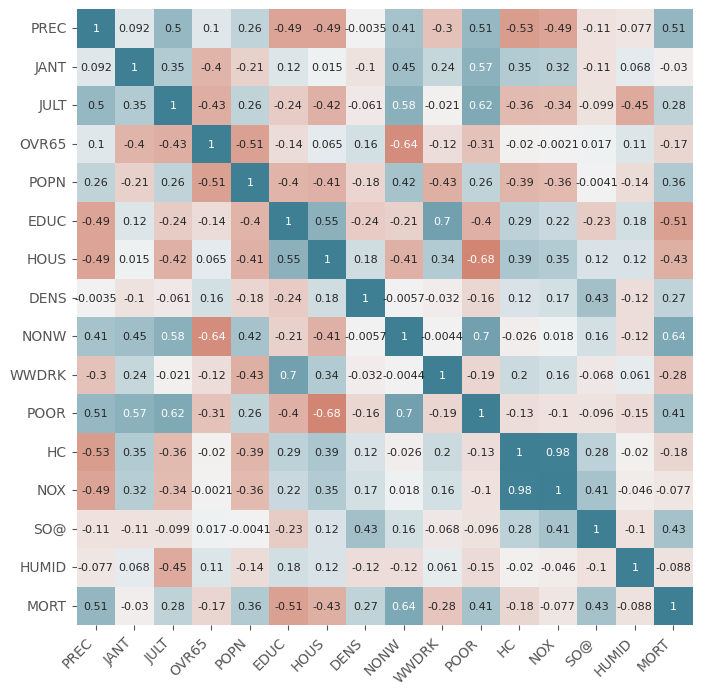

In [7]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Base de datos de Entrenamiento y Testeo

Extraer un 80% de la base de datos para entrenamiento y el otro 20% para testeo.

In [20]:
X = df_pollution.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y = df_pollution['MORT'] # Salida (variable dependiente)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle=True)
print(X_train.shape, X_test.shape)

(48, 15) (12, 15)


## Creación y análisis del modelo con todas las Variables

Usando la función OLS() del paquete *statsmodels* vamos a realizar diversos modelos lineales intentando mejorar lo máximo posible el R2 ajustado (*Adj. R-squared*).
1. Crear un modelo lineal con la base de datos de entrenamiento usando todas las variables independientes.
2. Analizar los p-valores de las variables considerando un nivel de confianza del 95% (nivel de significación del p-value<0.05). ¿Cuántas variables independientes están por debajo de ese umbral?
3. Calcular el RMSE y MAE con la matriz de testeo. Interprete el modelo y explique el significado de los errores RMSE y MAE obtenidos.
4. Analizar los coeficientes de las variables climatológicas vs los valores de la matriz de correlación. ¿Qué ocurre aquí?
**Justifica todas las respuestas.**

Nota: *repasar en https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html los apartados relativos a la bondad del ajuste del modelo, las significancia del modelo F-test y de los predictores*.


In [17]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     9.953
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.05e-08
Time:                        10:54:41   Log-Likelihood:                -230.66
No. Observations:                  48   AIC:                             489.3
Df Residuals:                      34   BIC:                             515.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DENS           0.0011      0.005      0.223      0.8

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)
y_hat = modelo.predict(X_test)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}')

ValueError: ignored

## Modelo eliminando variables con alta correlación

Utilizando la función *tidy_corr_matrix()* analizar las variables que tienen una correlación mayor de 0.65 (en valor absoluto).
- Entre parejas de variables con alta correlación, eliminar una de ellas y obtener un nuevo modelo sin esas variables.
- Observar el R2 ajustado, el *Prob (F-statistic)* del modelo y los errores MAE y RMSE con la base de datos de testeo. ¿Han mejorado?
- ¿Cuántas variables independientes tienen ahora significancia estadística? 

**Justifica todas las respuestas**

## Creación de un modelo con Selección Hacia Atrás (Backwards)

La función *elimina_mayor_p_valor()* devuelve un array con las variables de entrada eliminando el atributo que mayor *p-value* tiene. 
- Utilizando esta función, realizar una búsqueda hacia atrás, *backwards*, eliminando variables hasta que el RMSE de testeo deje de bajar.
- Para cada paso, guardar el R2 Ajustado, el *Prob (F-statistic)* del modelo y, los errores MAE y RMSE con la base de datos de testeo.
- **Crear una tabla** mostrando la evolución de los resultados del proceso *backwards* paso a paso.

**Justifica todas las respuestas**

In [11]:
# Función que devuelve todas las variables independientes excepto la que tiene mayor p_valor
def elimina_mayor_p_valor(x,y):
    modelo_OLS = sm.OLS(y, x).fit()
    pvalores = modelo_OLS.pvalues
    donde_mayor = np.argmax(pvalores)
    print(f"Eliminada la variable = {pvalores.index[donde_mayor]} con p-value={pvalores[donde_mayor]}")
    return np.setdiff1d(pvalores.index, pvalores.index[donde_mayor])
selec_vars = X_train.columns




In [22]:
while len(selec_vars) > 0:
    x_train_sel = X_train[selec_vars]
    x_train_sel = sm.add_constant(x_train_sel)
    eliminada = elimina_mayor_p_valor(x_train_sel, y_train)
    if len(eliminada) == len(selec_vars):
        print("No quedan variables en el modelo.")
        break
    else:
        selec_vars = eliminada
        X_train = sm.add_constant(x_train_sel, prepend=True)
        modelo  = sm.OLS(endog=y_train, exog=X_train,)
        modelo  = modelo.fit()
        print(modelo.summary())
        from sklearn.metrics import mean_absolute_error, mean_squared_error
        X_test = sm.add_constant(X_test[selec_vars], prepend=True)
        y_hat = modelo.predict(X_test)
        MAE = mean_absolute_error(y_test, y_hat)
        RMSE = mean_squared_error(y_test, y_hat, squared=False)
        print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}'

IndentationError: ignored

## Interpretación de resultados

Con el mejor modelo conseguido:
- Analizar los resultados que muestra la función OLS().
- Interpretar los atributos finales y su importancia analizando: el *p-value* de los mismos, y sus intervalos de confianza. ¿Qué crees que explica cada una de las características?
 Comparar los errores MAE y RMSE con la base de datos de testeo y con los mejores modelos de los puntos anteriores.
- Dibujar los residuos usando el código de ejemplo y explicar lo que indica cada una de las gráficas.

**Justifica todas las respuestas**

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     8.130
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.05e-07
Time:                        10:00:37   Log-Likelihood:                -230.64
No. Observations:                  48   AIC:                             493.3
Df Residuals:                      32   BIC:                             523.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1928.4884    624.181      3.090      0.0

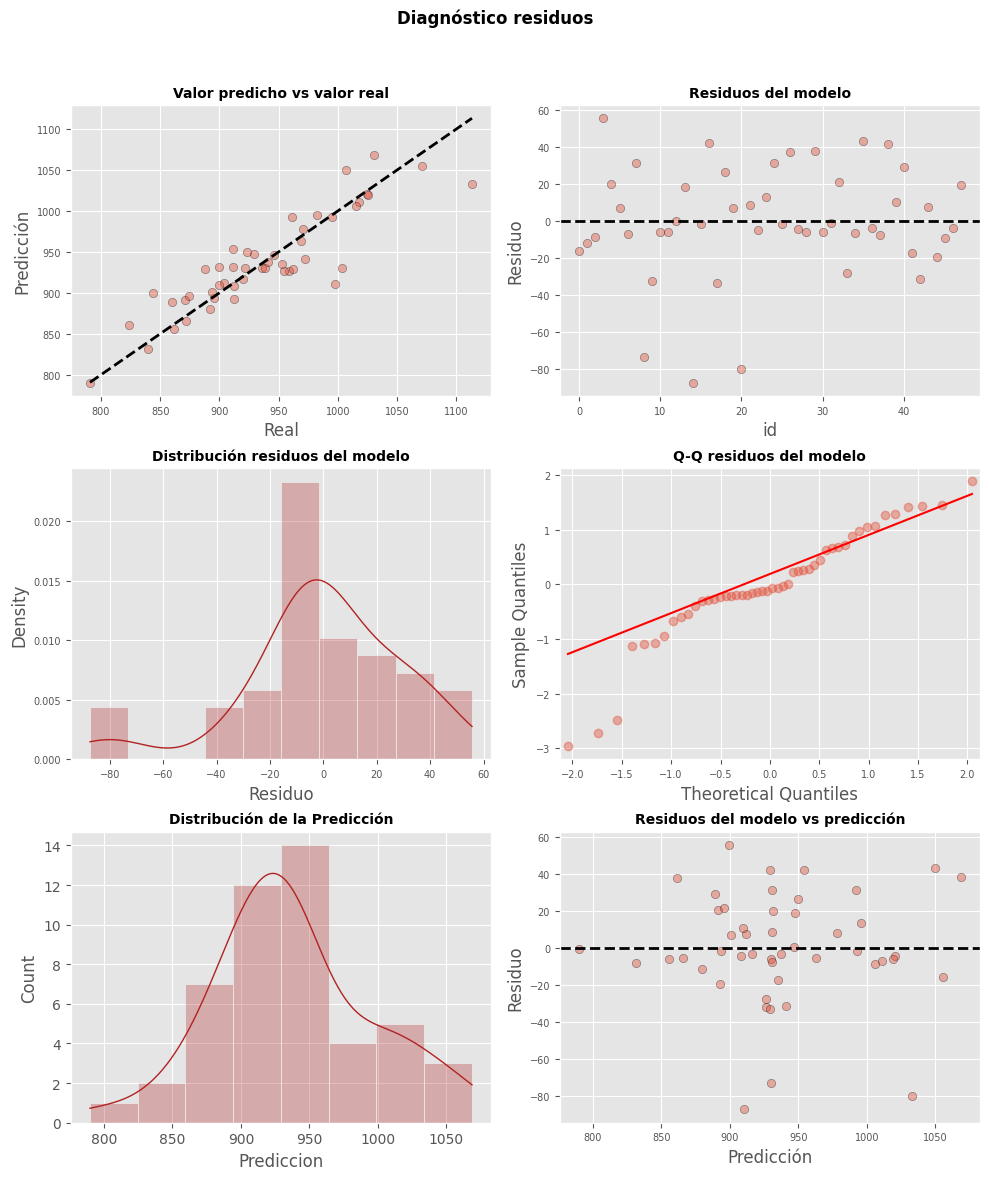

In [ ]:
prediccion_train = modelo.predict(X_train[selec_vars]).values
residuos_train   = prediccion_train - y_train.values

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)



sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)



axes[2, 1].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 1].set_xlabel('Predicción')
axes[2, 1].set_ylabel('Residuo')
axes[2, 1].tick_params(labelsize = 7)



fig2 = sns.histplot(ax=axes[2,0], x='Prediccion', data=pd.DataFrame({'Prediccion':prediccion_train}), kde=True,
                        line_kws= {'linewidth': 1},  color   = "firebrick",  alpha   = 0.3)
fig2.set_title('Distribución de la Predicción', fontsize = 10, fontweight = "bold")

# Se eliminan los axes vacíos
# fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

# Recuerda 

Si usas Colab, **recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File**.

In [ ]:
df_pollution.drop(columns=['NOX'], inplace=True)

In [ ]:
X = df_pollution.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y = df_pollution['MORT'] # Salida (variable dependiente)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle=True)
print(X_train.shape, X_test.shape)

(48, 14) (12, 14)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)
y_hat = modelo.predict(X_test)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}')

MAE=36.216, RMSE=43.842


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     8.975
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.32e-07
Time:                        09:12:26   Log-Likelihood:                -230.65
No. Observations:                  48   AIC:                             491.3
Df Residuals:                      33   BIC:                             519.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1908.0610    599.910      3.181      0.0

In [ ]:
df_pollution.drop(columns=['POOR'], inplace=True)

In [ ]:
X = df_pollution.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y = df_pollution['MORT'] # Salida (variable dependiente)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle=True)
print(X_train.shape, X_test.shape)

(48, 13) (12, 13)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)
y_hat = modelo.predict(X_test)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}')

MAE=36.038, RMSE=43.087


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     9.906
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.29e-08
Time:                        09:13:28   Log-Likelihood:                -230.75
No. Observations:                  48   AIC:                             489.5
Df Residuals:                      34   BIC:                             515.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1980.5520    559.905      3.537      0.0

In [ ]:
df_pollution.drop(columns=['WWDRK'], inplace=True)

In [ ]:
X = df_pollution.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y = df_pollution['MORT'] # Salida (variable dependiente)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle=True)
print(X_train.shape, X_test.shape)

(48, 12) (12, 12)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)
y_hat = modelo.predict(X_test)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}')

MAE=36.634, RMSE=42.492


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     10.95
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.40e-08
Time:                        09:14:54   Log-Likelihood:                -230.93
No. Observations:                  48   AIC:                             487.9
Df Residuals:                      35   BIC:                             512.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1968.2557    553.333      3.557      0.0